In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import warnings

In [2]:
import geopandas

In [3]:
national_df = pd.read_csv('../Resources/national_Heart_Disease.csv')
national_df.head()

,Unnamed: 0,State,LocationDesc,GeographicLevel,"Data Value (Per 100,000 Population)",Gender,Race/Ethnicity,LocationID,Latitude,Longitude
0,67197,US,United States,Nation,165.1,Overall,Asian,0,NaN,NaN
1,67973,US,United States,Nation,253.6,Female,Overall,0,NaN,NaN
2,68318,US,United States,Nation,292.3,Male,Hispanic,0,NaN,NaN
3,69192,US,United States,Nation,218.5,Female,American Indian or Alaska Native,0,NaN,NaN
4,69416,US,United States,Nation,417.5,Male,Native Hawaiian or Other Pacific Islander,0,NaN,NaN


In [4]:
Overall_df = national_df[national_df['Gender'] == 'Overall']
Overall_df = Overall_df.sort_values(by='Data Value (Per 100,000 Population)', ascending=False)
Overall_df = Overall_df[Overall_df['Race/Ethnicity'] != 'Overall']

In [5]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
# plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-poster')


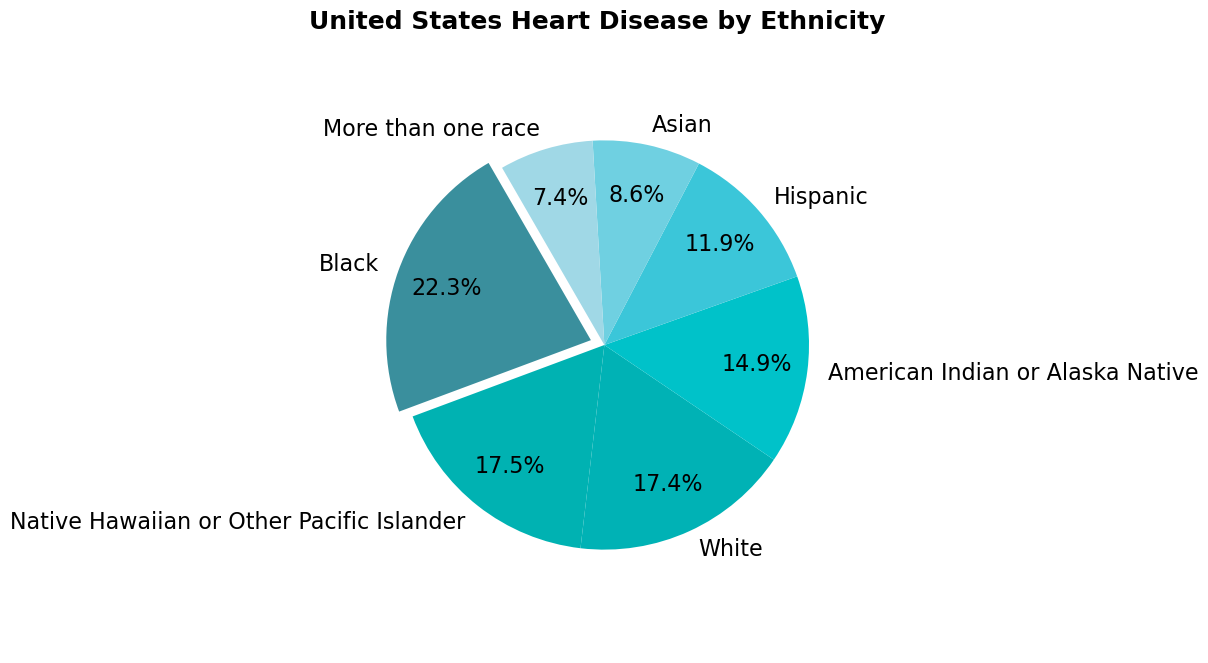

In [7]:
data = Overall_df["Data Value (Per 100,000 Population)"]
labels = Overall_df["Race/Ethnicity"]
explode = [0.07,0,0,0,0,0,0]

# colors = ["#3A8F9D", "#FF6F61", "#FF7F50", "#FF8C69", "#FFB74D", "#FFCC80", "#FFE0B2"]
colors = ["#3A8F9D", "#00B2B2", "#00B2B5", "#00C2C9", "#3BC6D9", "#6FD0E1", "#A0D8E6"]

plt.figure(figsize=(6,8))
plt.title("United States Heart Disease by Ethnicity", fontsize=18, fontweight="bold")
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct= '%1.1f%%', textprops={'fontsize': 16}, pctdistance=0.75, labeldistance=1.1, startangle=120)
plt.axis('equal')
plt.show()

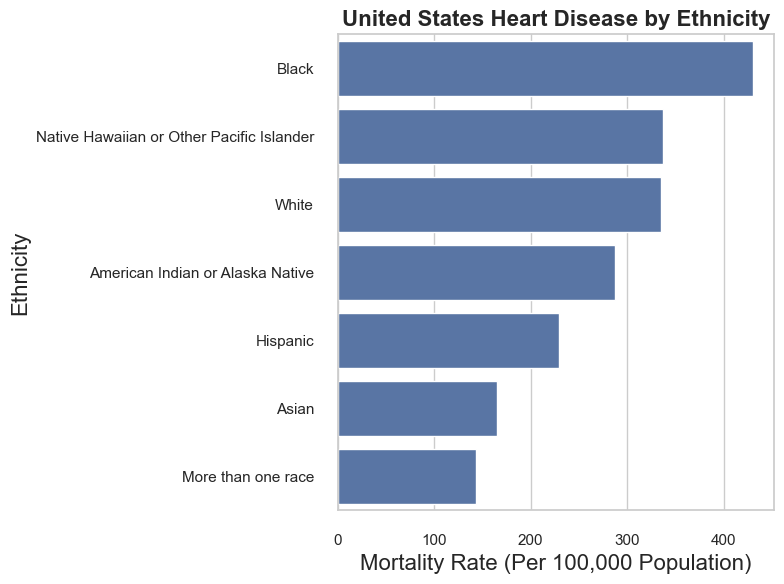

In [8]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar plot
sns.barplot(data=Overall_df, x='Data Value (Per 100,000 Population)', y='Race/Ethnicity', color='b')

# Customize the plot
plt.xlabel('Mortality Rate (Per 100,000 Population)', fontsize=16)
plt.ylabel('Ethnicity', fontsize=16)
plt.title('United States Heart Disease by Ethnicity', fontsize=16, fontweight="bold",)

# Show the plot
plt.tight_layout()
plt.show()

# Plotly Choropleth

In [9]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.colors as colors

In [10]:
state_df = pd.read_csv('../Resources/state_Heart_Disease.csv')


In [11]:
state_df = state_df[state_df['Race/Ethnicity'] == 'Overall']


In [12]:
state_df_pivoted = state_df.pivot(index='State', columns='Gender', values='Data Value (Per 100,000 Population)').reset_index()
state_df_pivoted.rename(columns={'Overall': 'Overall Rate', 'Male': 'Male Rate', 'Female': 'Female Rate'}, inplace=True)
state_df_pivoted.head()

Gender,State,Female Rate,Male Rate,Overall Rate
0,AK,203.5,345.3,272.2
1,AL,356.5,570.3,451.9
2,AR,344.8,549.1,438.2
3,AS,NaN,NaN,NaN
4,AZ,218.9,353.2,282.1


In [13]:
state_full_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 
}

state_df_pivoted['Full State Name'] = state_df_pivoted['State'].map(state_full_names)
state_df_pivoted["M/F Difference"] = state_df_pivoted['Male Rate'] - state_df_pivoted['Female Rate']

In [14]:
states_to_remove = ['GU', 'DC', 'PR', 'VI', 'AS', 'MP']
state_df_pivoted = state_df_pivoted[~state_df_pivoted['State'].isin(states_to_remove)]

In [15]:
fig = go.Figure(data=go.Choropleth(
    locations=state_df_pivoted['State'],
    z=state_df_pivoted['Overall Rate'],
    locationmode='USA-states',
    colorscale='Magma_r',
    zmin=200, 
    zmax=600,  
    autocolorscale=False,
    marker_line_color='white',
    marker_line_width=0.5,
    colorbar_title="Mortality Rate (Per 100,000)",
    hoverinfo='text',
    customdata=state_df_pivoted[['Full State Name', 'Male Rate', 'Female Rate']],
    hovertemplate="<span style='font-size: 15px;'><b>%{customdata[0]}</b></span><br>" +  # Display the state name
                  "Mortality Rate: %{z}<br>" +               # Display the overall mortality rate
                  # "Male Rate:     %{customdata[1]}<br>" +   # Display the male mortality rate
                  # "Female Rate: %{customdata[2]}<br>" + # Display the female mortality rate
                  "<extra></extra>",  # Remove the default hover text
))

fig.update_layout(
    title_text = "<b>USA Heart Disease Mortality Rate</b>",
    title_x=0.5,  # Center the title
    title_y=0.9, # Center the title
    geo_scope= 'usa',
    width = 1000,
    height = 600,
    showlegend=False,
    paper_bgcolor='White',
    title_font_color='Black',
    title_font_size=25,
    margin=dict(l=10, r=10, t=50, b=10)  # Adjust the margins (left, right, top, bottom)
)

fig.show()

In [16]:
state_df_sorted = state_df_pivoted.sort_values(by='Overall Rate', ascending=False)
state_df_sorted.head()

Gender,State,Female Rate,Male Rate,Overall Rate,Full State Name,M/F Difference
39,OK,376.9,596.7,477.7,Oklahoma,219.8
28,MS,364.4,596.8,467.8,Mississippi,232.4
1,AL,356.5,570.3,451.9,Alabama,213.8
2,AR,344.8,549.1,438.2,Arkansas,204.3
20,LA,333.0,544.9,427.8,Louisiana,211.9


In [17]:
fig = px.scatter(state_df_pivoted, 
                 x='Overall Rate', 
                 y='M/F Difference', 
                 hover_name='Full State Name', 
                 size='Overall Rate', 
                 color='State', 
                 height=600)  # Set the height to your desired value (e.g., 600 pixels)
fig.update_traces(showlegend=False)
fig.update_layout(title='<b>USA Heart Disease Overall Mortality Rate vs Male/Female Difference Rate</b>')
fig.show()
# color_discrete_sequence=px.colors.sequential.Reds

## Dash  App

In [18]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

/var/folders/gj/34pvzc9x2x98g0vpglqmrsz80000gn/T/ipykernel_65709/3649862469.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/var/folders/gj/34pvzc9x2x98g0vpglqmrsz80000gn/T/ipykernel_65709/3649862469.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [19]:
state_df_pivoted.head()

Gender,State,Female Rate,Male Rate,Overall Rate,Full State Name,M/F Difference
0,AK,203.5,345.3,272.2,Alaska,141.8
1,AL,356.5,570.3,451.9,Alabama,213.8
2,AR,344.8,549.1,438.2,Arkansas,204.3
4,AZ,218.9,353.2,282.1,Arizona,134.3
5,CA,210.8,357.8,277.4,California,147.0


In [20]:
female_df = state_df_pivoted.sort_values(by='Female Rate', ascending=True)
female_df.head()

Gender,State,Female Rate,Male Rate,Overall Rate,Full State Name,M/F Difference
13,HI,162.2,327.9,238.7,Hawaii,165.7
25,MN,179.8,295.5,231.4,Minnesota,115.7
21,MA,193.1,327.3,250.8,Massachusetts,134.2
6,CO,201.1,312.3,252.6,Colorado,111.2
0,AK,203.5,345.3,272.2,Alaska,141.8


In [21]:
app = dash.Dash(__name__)

In [22]:
app.layout = html.Div([
    html.Div([
        html.Div('Select Gender:', style={'fontSize': 25, 'color': 'white'}),
        dcc.RadioItems(
            id='gender-selector',
            options=[
                {'label': 'Male', 'value': 'Male Rate'},
                {'label': 'Female', 'value': 'Female Rate'},
                {'label': 'Overall', 'value': 'Overall Rate'}
            ],
            value='Overall Rate',  # Default value
            labelStyle={'display': 'inline-block', 'margin': '10px', 'color': 'white'}  # Style for radio items
        )
    ], style={'textAlign': 'left', 'marginBottom': '10px'}),
    
    dcc.Graph(id='choropleth-map', style={'width': '100%', 'height': '400px'})  # Set the graph to full width
])

In [23]:
@app.callback(
    Output('choropleth-map', 'figure'),
    Input('gender-selector', 'value')
)
def update_graphs(selected_rate):
    # Update Choropleth Map
    choropleth_fig = go.Figure(data=go.Choropleth(
        locations=state_df_pivoted['State'],
        z=state_df_pivoted[selected_rate],
        locationmode='USA-states',
        colorscale='Magma_r',
        zmin=160, 
        zmax=600,  
        autocolorscale=False,
        marker_line_color='white',
        marker_line_width=0.5,
        colorbar_title="Mortality Rate (Per 100,000)",
        hoverinfo='text',
        customdata=state_df_pivoted[['Full State Name', 'Male Rate', 'Female Rate']],
        hovertemplate="<span style='font-size: 14px;'><b>%{customdata[0]}</b></span><br>" +
                      "Mortality Rate: %{z}<br>" +
                      "<extra></extra>",
    ))

    choropleth_fig.update_layout(
        title_text="<b>USA Heart Disease Mortality Rate by Gender</b>",
        title_y=0.9,
        geo_scope='usa',
        width=1000,  # You can adjust this if needed
        height=600,  # Keep the height consistent
        showlegend=False,
        paper_bgcolor='darkgrey',
        title_font_color='White',
        title_font_size=28,  # Reduce title font size
        margin=dict(l=10, r=10, t=50, b=10)
    )

    return choropleth_fig

In [ ]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

AssertionError: The setup method 'errorhandler' can no longer be called on the application. It has already handled its first request, any changes will not be applied consistently.
Make sure all imports, decorators, functions, etc. needed to set up the application are done before running it.

: 